In [54]:
from ROOT import TCanvas, TH1D, TH1F #must install root
import uproot #reads root files in python
import math
import numpy as np
import pandas
import matplotlib.pyplot as plt
        
#All needed fucntions used in python

In [55]:
Xic0MassHist = TCanvas('Histogram of Xi c0 Mass', "", 720, 480) #Defined a canvas

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Histogram of Xi c0 Mass


In [56]:
Xic0M = TH1D("Xi_DDL, Omega- K+", "DDL Cuts", 100, 2300, 3100) #Defined a plot to put onto that canvas

Warning in <TROOT::Append>: Replacing existing TH1: Xi_DDL, Omega- K+ (Potential memory leak).


In [57]:
tuples = uproot.open("myOmegamKpTuple_0.root") 

In [58]:
tree = uproot.open("myOmegamKpTuple_0.root")["myOmegamKpTuple"]["DecayTree"] #Selects the file myOmegamKpTuple_0.root, then opens the folder myOmegamKpTuple
#and then opens the folder Decay Tree

In [59]:
eStart = 0
eStop = 5000000 #These are used to select all of the events, len() could have worked too but picking a big number is easier

In [60]:
Xic0_MM = tree["Xi_c0_MM"].array(entrystart = eStart, entrystop = eStop)
Xi_c0_PT = tree["Xi_c0_PT"].array(entrystart = eStart, entrystop = eStop)

Omega_MM = tree["Omega_MM"].array(entrystart = eStart, entrystop = eStop)

OmegaK_TRACK_Type = tree["OmegaK_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)
OmegaK_ProbNNk = tree["OmegaK_ProbNNk"].array(entrystart = eStart, entrystop = eStop)

Lambda_MM = tree["Lambda_MM"].array(entrystart = eStart, entrystop = eStop)

LambdaPr_ProbNNp = tree["LambdaPr_ProbNNp"].array(entrystart = eStart, entrystop = eStop)
LambdaPr_TRACK_Type = tree["LambdaPr_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)

LambdaPi_ProbNNpi = tree["LambdaPi_ProbNNpi"].array(entrystart = eStart, entrystop = eStop)
LambdaPi_TRACK_Type = tree["LambdaPi_TRACK_Type"].array(entrystart = eStart, entrystop = eStop)

PromptPi_ProbNNk = tree["PromptPi_ProbNNk"].array(entrystart = eStart, entrystop = eStop)
PromptPi_IPCHI2_OWNPV = tree["PromptPi_IPCHI2_OWNPV"].array(entrystart = eStart, entrystop = eStop)

#Selecting the tuples and defining them as their own variable name

In [61]:
Omega_MM_Corrected = Omega_MM - Lambda_MM + 1115.683 #Better Omega_MM measurement

In [62]:
Omega_MM_Corrected_v2 = (Omega_MM_Corrected > 1665) & (Omega_MM_Corrected < 1680)
OmegaK_Corrected = (OmegaK_ProbNNk > 0.55)

Lambda_MM_Corrected = (Lambda_MM > 1112) & (Lambda_MM < 1120)

LambdaPr_ProbNNp_Corrected = (LambdaPr_ProbNNp > 0.1)

LambdaPi_ProbNNpi_Corrected = (LambdaPi_ProbNNpi > 0.05)

PromptPi_ProbNNk_Corrected = (PromptPi_ProbNNk  > 0.55)
PromptPi_IPCHI2_OWNPV_Corrected = (PromptPi_IPCHI2_OWNPV > 6)

#Cuts

In [63]:
FirstCuts = Omega_MM_Corrected_v2 & OmegaK_Corrected & Lambda_MM_Corrected & LambdaPr_ProbNNp_Corrected & LambdaPi_ProbNNpi_Corrected & PromptPi_ProbNNk_Corrected & PromptPi_IPCHI2_OWNPV_Corrected
#Defining what cuts should be applied to Xi_c0 as FirstCuts

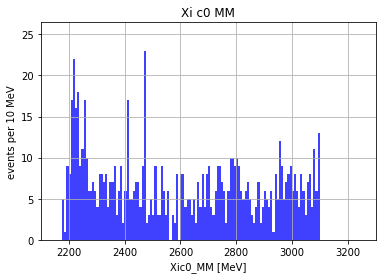

In [67]:
Corrected_Xic0_Mass = Xic0_MM[FirstCuts] #Applying cuts to Xic0_MM 
nEvents = len(Corrected_Xic0_Mass)
nEvents2 = range(0, nEvents)
plt.figure()
n, bins, patches = plt.hist(Corrected_Xic0_Mass, 120, density=False, facecolor="b", alpha=0.75)
plt.xlabel('Xic0_MM [MeV]')
plt.ylabel('events per 10 MeV')
plt.title('Xi c0 MM')
plt.axis([2100,3300,0,1.15*max(n)])
plt.grid(True)
plt.show()
plt.close()

TypeError: none of the 3 overloaded methods succeeded. Full details:
  int TH1::Fill(double x) =>
    could not convert argument 1 (only size-1 arrays can be converted to Python scalars)
  int TH1::Fill(const char* name, double w) =>
    takes at least 2 arguments (1 given)
  int TH1::Fill(double x, double w) =>
    takes at least 2 arguments (1 given)

In [22]:
print(Xic0_MM)

[2605.64014859 2338.69389428 2725.64878143 ... 2664.69630519 2546.35281905
 2353.63006986]
